In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
TRAINING_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\train"
VALIDATION_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\validation"
TESTING_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\test"

TRAINING_FLEA_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\train\flea_allergy"
VALIDATION_FLEA_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\validation\flea_allergy"
TEST_FLEA_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\test\flea_allergy"

TRAINING_HOTSPOT_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\train\hotspot"
VALIDATION_HOTSPOT_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\validation\hotspot"
TESTING_HOTSPOT_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\test\hotspot"

TRAINING_MANGE_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\train\mange"
VALIDATION_MANGE_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\validation\mange"
TESTING_MANGE_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\test\mange"

TRAINING_RINGWORM_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\train\ringworm"
VALIDATION_RINGWORM_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\validation\ringworm"
TESTING_RINGWORM_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\test\ringworm"


In [3]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                     fill_mode='nearest',
                                     #rotation_range=40,
                                     #width_shift_range=0.2,
                                     #height_shift_range=0.2,
                                     #shear_range=0.2,
                                     #zoom_range=0.2,
                                     #horizontal_flip=True,
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0 / 255. )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=16,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [4]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 373 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [5]:
#create function to show image examples
def show_image_samples(gen):
  train_dict = train_generator.class_indices
  classes = list(train_dict.keys())
  images, labels = next(gen) #get a sample batch from generator
  plt.figure(figsize=(20,20))
  length = len(labels)
  if length < 10:
    r = length
  else:
    r = 10
  for i in range(r):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='black', fontsize=18)
    plt.axis('off')
  plt.show()



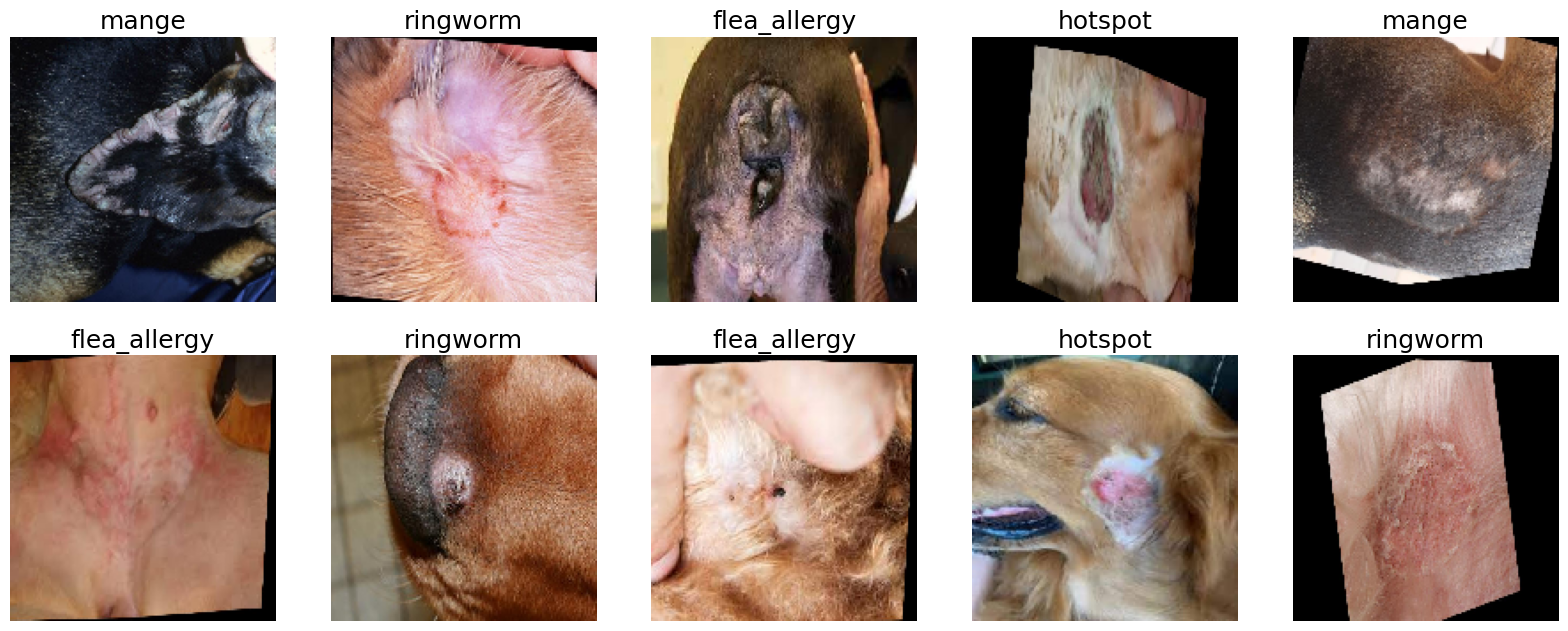

In [6]:
show_image_samples(train_generator)

In [7]:
def create_model():

  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(8, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Dense(16, activation='relu'),
      #tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Flatten(),
      
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(4, activation='softmax')                           
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 

  return model

In [8]:
model = create_model()

C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 74, 74, 16)          │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │       2,803,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,804,244 (10.70 MB)

 Trainable params: 2,804,244 (10.70 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Mendefenisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5, 
    min_delta=0.00001,
    verbose=1,
)

# Define the path to the project folder
checkpoint_path = os.path.join(os.path.expanduser("~"), "Desktop", "project_1", "SkinDisease.weights.h5")

# Model Checkpoint
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,  # This can remain True
    verbose=1
)



In [11]:
history = model.fit(train_generator,
            epochs=50,
            validation_data=validation_generator,
            verbose = 1,
            callbacks = [early_stopping, checkpoint])

Epoch 1/50


C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.2639 - loss: 4.2483
Epoch 1: val_loss improved from inf to 1.87711, saving model to C:\Users\Dell\Desktop\project_1\SkinDisease.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.2638 - loss: 4.2007 - val_accuracy: 0.2500 - val_loss: 1.8771
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3375 - loss: 1.5532
Epoch 2: val_loss improved from 1.87711 to 1.38241, saving model to C:\Users\Dell\Desktop\project_1\SkinDisease.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.3394 - loss: 1.5478 - val_accuracy: 0.2750 - val_loss: 1.3824
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4344 - loss: 1.2920
Epoch 3: val_loss improved from 1.38241 to 1.32332, saving model to C:\Users\Dell\Desktop\project_1\SkinDisease.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.4337 - loss: 1.2920 - val_accuracy: 0.4000 - val_loss: 1.3233
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0

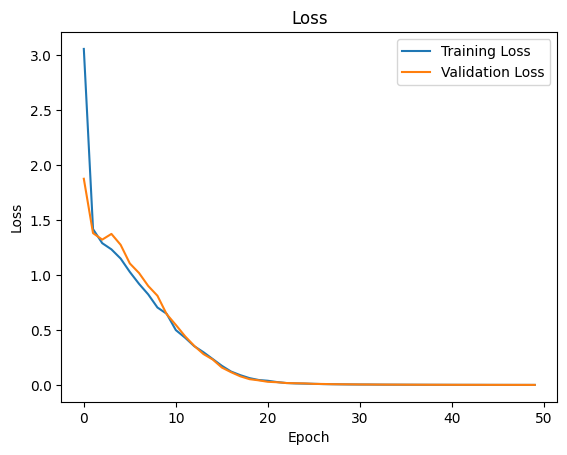

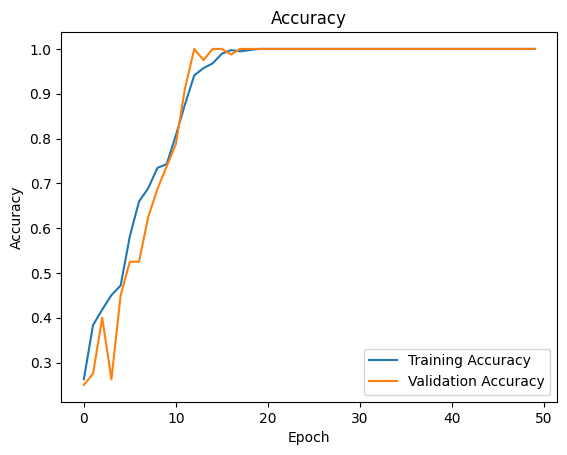

In [12]:
# Obtain training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Draw loss plot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()
print()

# Draw accuracy plot
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [13]:
TEST_DIR = r"C:\Users\Dell\OneDrive\Desktop\project_1\test"
test_datagen = ImageDataGenerator(rescale = 1.0 / 255. )

# pass in the appropriate arguments to the flow_from_directory method
test_set_2 = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

Found 80 images belonging to 4 classes.


In [14]:
Y_pred_2 = model.predict(test_set_2)
y_pred_2 = np.argmax(Y_pred_2, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


In [15]:
print(classification_report(test_set_2.classes, y_pred_2))

              precision    recall  f1-score   support

           0       0.35      0.35      0.35        20
           1       0.15      0.15      0.15        20
           2       0.20      0.20      0.20        20
           3       0.25      0.25      0.25        20

    accuracy                           0.24        80
   macro avg       0.24      0.24      0.24        80
weighted avg       0.24      0.24      0.24        80



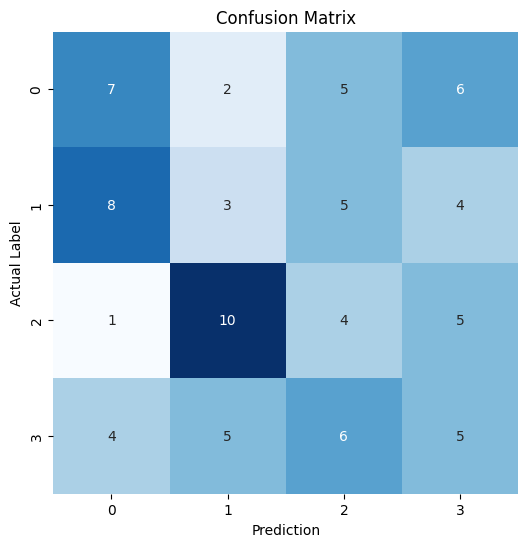

In [16]:
# Misalkan test_set_2.classes adalah label yang sebenarnya dan y_pred_2 adalah label prediksi
y_true = test_set_2.classes  # Label yang sebenarnya
y_pred = y_pred_2  # Label prediksi

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Menampilkan confusion matrix dalam bentuk heatmap
class_names = ['0', '1', '2', '3']  # Nama kelas (sesuaikan dengan kelas Anda)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediction')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
#Save model to h5 format

model.save("SkinDisease.weights.h5")

In [18]:
def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1.0/225.)
  im_input = tf.reshape(im_array, shape = [1, 150, 150, 3])

  predict_array = model.predict(im_input)[0]

  import pandas as pd
  df = pd.DataFrame(predict_array)
  df = df.rename({0:'Probability'}, axis = 'columns')
  prod = ['flea_allergy', 'hotspot', 'mange', 'ringworm']
  df['Animal'] = prod
  df = df[['Animal', 'Probability']]

  predict_label = np.argmax(model.predict(im_input))

  if predict_label == 0:
      predict_product = 'flea_allergy'
  elif predict_label == 1:
      predict_product = 'hotspot'
  elif predict_label == 2:
      predict_product = 'mange'
  else:
      predict_product = 'ringworm'

  return predict_product, df

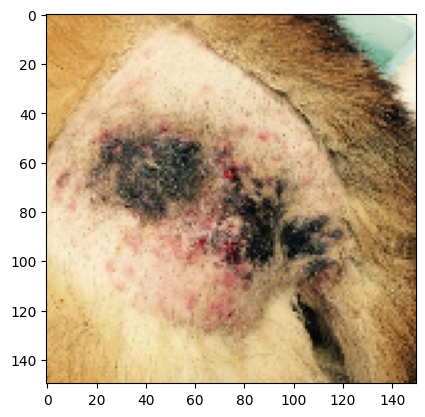

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


The image is detected as hotspot




In [24]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Assuming predict_image function is defined elsewhere
# Define the path to your image
image_path = r"C:\Users\Dell\OneDrive\Desktop\project_1\hotspot_1.jpg"  # Change this to the path of your image

# Load and display the image
img = image.load_img(image_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

# Preprocess the image for prediction
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Assuming predict_image function is defined elsewhere
label, df = predict_image(x)

print('\n')
print("The image is detected as " + label)
print('\n')

